# Multi Layer Perceptron on Fashion MNIST Datset

[Dataset on kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## Contents
* Data Cleaning
* Data Preprocessing
* Modeling
* Evaluation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras

In [3]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [5]:
data_train.shape

(60000, 785)

In [7]:
data_train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


### Data Cleaning

In [11]:
X_train = data_train.drop(['label'], axis=1).values
y_train = data_train['label'].values
del data_train

In [12]:
X_test = data_test.drop(['label'], axis=1).values
y_test = data_test['label'].values
del data_test

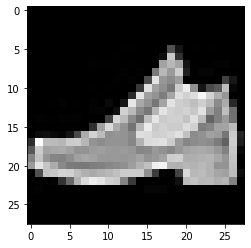

In [15]:
plt.imshow(X_train[1].reshape(28, 28), cmap='gray')
plt.show()

### Data Preprocessing
* Scaling
* Encoding

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [17]:
X_train.shape

(60000, 784)

In [18]:
X_test.shape

(10000, 784)

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_test.shape

(10000, 10)

### Modeling
* Callbacks: EarlyStopping
* Input layer: 300 units with relu activation and 0.3 dropout
* Hidden layers: 2 hidden layers with relu activation, first layer has 50 units with 0.2 dropout and second layer has 10 units
* Output layer: 10 units with softmax activation
* Optimizer: Adam
* Loss: CategoricalCrossentropy
* Metric: CategoricalAccuracy

In [21]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(units=300, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [26]:
model.compile(optimizer=keras.optimizers.Adam(0.001), loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                15050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 251,170
Trainable params: 251,170
Non-trai

In [28]:
history = model.fit(X_train, y_train, epochs=30, batch_size=200, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/30
300/300 [==============================] - 3s 7ms/step - loss: 0.7993 - categorical_accuracy: 0.7245 - val_loss: 0.4622 - val_categorical_accuracy: 0.8379
Epoch 2/30
300/300 [==============================] - 2s 6ms/step - loss: 0.4767 - categorical_accuracy: 0.8313 - val_loss: 0.3887 - val_categorical_accuracy: 0.8612
Epoch 3/30
300/300 [==============================] - 2s 6ms/step - loss: 0.4214 - categorical_accuracy: 0.8504 - val_loss: 0.3666 - val_categorical_accuracy: 0.8648
Epoch 4/30
300/300 [==============================] - 2s 6ms/step - loss: 0.3950 - categorical_accuracy: 0.8584 - val_loss: 0.3473 - val_categorical_accuracy: 0.8738
Epoch 5/30
300/300 [==============================] - 2s 6ms/step - loss: 0.3752 - categorical_accuracy: 0.8654 - val_loss: 0.3380 - val_categorical_accuracy: 0.8741
Epoch 6/30
300/300 [==============================] - 2s 6ms/step - loss: 0.3568 - categorical_accuracy: 0.8703 - val_loss: 0.3222 - val_categorical_accuracy: 0.8805
Epoc

### Evaluation

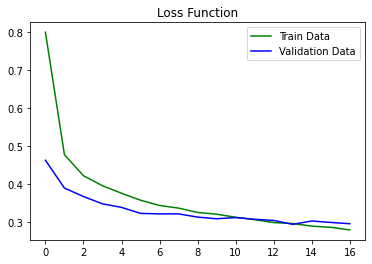

In [29]:
plt.plot(history.history['loss'], color='green', label='Train Data')
plt.plot(history.history['val_loss'], color='blue', label='Validation Data')
plt.title('Loss Function')
plt.legend()
plt.show()

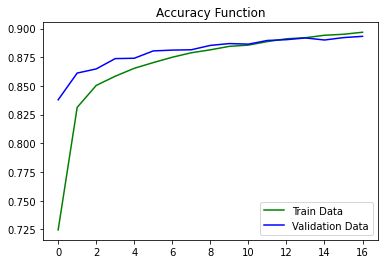

In [30]:
plt.plot(history.history['categorical_accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_categorical_accuracy'], color='blue', label='Validation Data')
plt.title('Accuracy Function')
plt.legend()
plt.show()